In [1]:
#Programmer : Aditya Rokade
#College : Keystone School of Engineering
#Year  : TE

In [52]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [40]:
data = {
    'name': pd.Series(['Alice', 'Bob', 'Emily', 'Jack', 'Sophia', 'Liam', 'Olivia', 'Ethan', 'Ava', 'Noah', 'Emma', 'Mason',
                       'Isabella', 'James', 'Mia', 'William', 'Charlotte', 'Alexander', 'Amelia', 'Michael', 'Harper', 'Benjamin',
                       'Evelyn','Elijah', 'Abigail']
),
    'division': pd.Series(['A', 'B', 'A', 'C', 'B', 'A', 'B', 'C', 'B', 'A', 'C', 'B', 'A', 'C', 'B', 'A', 'C','A', 'A', 'B', 'C', 'C','B', 'A', 'C']
),
    'Phy': pd.Series([85, 70, 92, None, 78, 63, 88, None, 95, 60, 75, 83, 87, None, 69, 91, None, 79, 82, 94, 66, None, 80, 77, 89]
),
    'Chem': pd.Series([82, 75,  89, 71,None,  96, 80, 73, None, 7, 60, 83, 69, 78, 91, None, 84, 76, 93, 65, 88, 79, None, 92, 70]
),
    'Maths': pd.Series([90, 68, None, 78, 85, 72, 94, 82, 63, 81, 76, None, 88, 77, 92, 70, 84, 79, 93, 91, 86, 74, 67, None, 95]
)
}

# Create the dataframe
df = pd.DataFrame(data)

In [41]:
df

,name,division,Phy,Chem,Maths
0,Alice,A,85.0,82.0,90.0
1,Bob,B,70.0,75.0,68.0
2,Emily,A,92.0,89.0,NaN
3,Jack,C,NaN,71.0,78.0
4,Sophia,B,78.0,NaN,85.0
5,Liam,A,63.0,96.0,72.0
6,Olivia,B,88.0,80.0,94.0
7,Ethan,C,NaN,73.0,82.0
8,Ava,B,95.0,NaN,63.0
9,Noah,A,60.0,7.0,81.0


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      25 non-null     object 
 1   division  25 non-null     object 
 2   Phy       20 non-null     float64
 3   Chem      21 non-null     float64
 4   Maths     22 non-null     float64
dtypes: float64(3), object(2)
memory usage: 1.1+ KB


In [43]:
df.describe()

,Phy,Chem,Maths
count,20.000000,21.000000,22.000000
mean,80.150000,76.238095,81.136364
std,10.418986,18.598131,9.523382
min,60.000000,7.000000,63.000000
25%,73.750000,71.000000,74.500000
50%,81.000000,79.000000,81.500000
75%,88.250000,88.000000,89.500000
max,95.000000,96.000000,95.000000


1. Scan all variables for missing values and inconsistencies. If there are missing values and/or inconsistencies, use any of the suitable techniques to deal with them.

In [44]:
df.isna().sum()

name        0
division    0
Phy         5
Chem        4
Maths       3
dtype: int64

In [45]:
#filling null values with avg of other two subject for that particular person.

df['Phy'].fillna(df[['Chem' , 'Maths']].mean(axis = 1), inplace = True)

df['Chem'].fillna(df[['Phy' , 'Maths']].mean(axis = 1), inplace = True)

df['Maths'].fillna(df[['Chem' , 'Phy']].mean(axis = 1), inplace = True)

In [58]:
# To round off marks i.e ( 94.5 = 95) --> (Completely Optional)

df['Maths'] = np.ceil(df['Maths']).astype(int)
df['Chem'] = np.ceil(df['Chem']).astype(int)
df['Phy'] = np.ceil(df['Phy']).astype(int)

2. Scan all numeric variables for outliers. If there are outliers, use any of the suitable techniques to deal with them.

<Axes: >

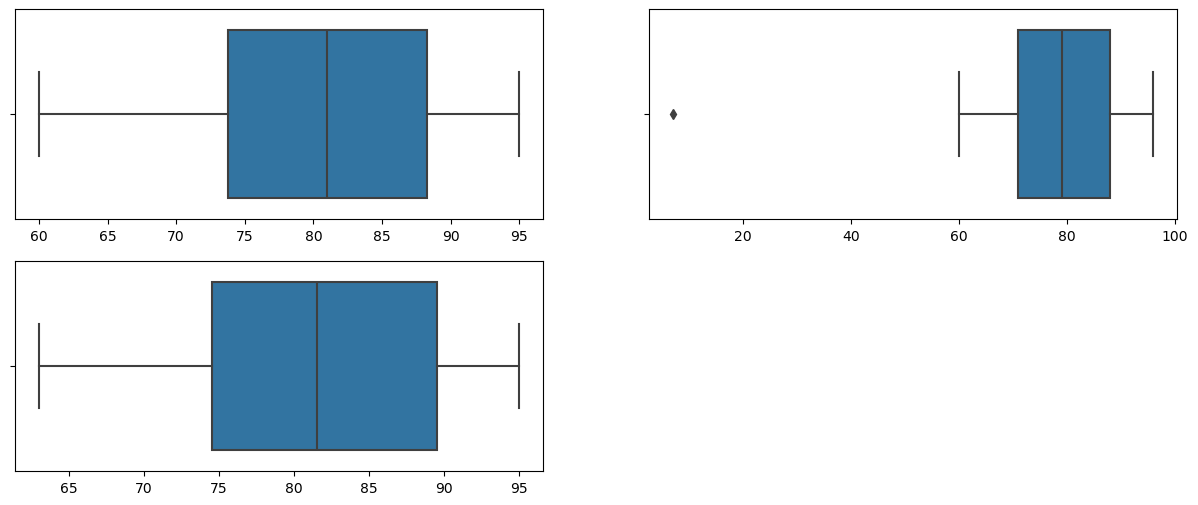

In [47]:
plt.figure(figsize = (15,6))
plt.subplot(2,2,1)
sns.boxplot(data = data,x = 'Phy')

plt.subplot(2,2,2)
sns.boxplot(data = data,x = 'Chem')

plt.subplot(2,2,3)
sns.boxplot(data = data,x = 'Maths')

In [48]:
def outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)

    IQR = Q3 - Q1
    # print(Q1,Q3,IQR)
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    return outliers

In [49]:
outliers = outliers(data['Chem'])
outliers

9    7.0
dtype: float64

In [51]:
exclude_outliers = df[~df['Chem'].isin(outliers)]
exclude_outliers

,name,division,Phy,Chem,Maths
0,Alice,A,85,82,90
1,Bob,B,70,75,68
2,Emily,A,92,89,91
3,Jack,C,75,71,78
4,Sophia,B,78,82,85
5,Liam,A,63,96,72
6,Olivia,B,88,80,94
7,Ethan,C,78,73,82
8,Ava,B,95,79,63
10,Emma,C,75,60,76


3. Apply data transformations on at least one of the variables.

In [55]:
scaler = MinMaxScaler()

In [56]:
df[['Phy', 'Chem', 'Maths']] = scaler.fit_transform(df[['Phy', 'Chem', 'Maths']])

In [57]:
df

,name,division,Phy,Chem,Maths
0,Alice,A,0.714286,0.842697,0.84375
1,Bob,B,0.285714,0.764045,0.15625
2,Emily,A,0.914286,0.921348,0.87500
3,Jack,C,0.428571,0.719101,0.46875
4,Sophia,B,0.514286,0.842697,0.68750
5,Liam,A,0.085714,1.000000,0.28125
6,Olivia,B,0.800000,0.820225,0.96875
7,Ethan,C,0.514286,0.741573,0.59375
8,Ava,B,1.000000,0.808989,0.00000
9,Noah,A,0.000000,0.000000,0.56250


c:\Users\Owner\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


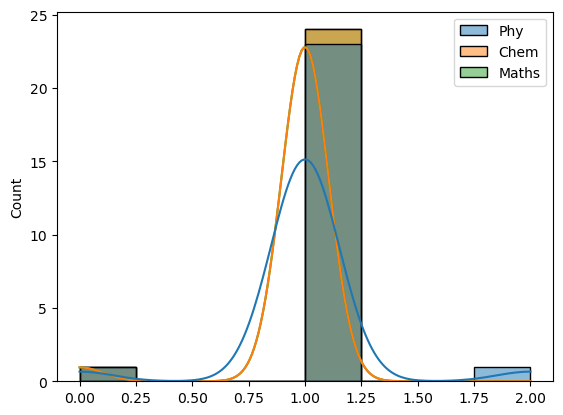

In [59]:
sns.histplot(df, kde=True);